<a href="https://colab.research.google.com/github/jiruneko/data_calculation/blob/main/Data_Caluculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=2,
    cluster_std=5.0,
    n_samples=300)

In [ ]:
import pandas as pd

df = pd.DataFrame(X)
df["target"] = y
df.head()

,0,1,target
0,12.891994,9.026185,0
1,6.434431,0.322126,1
2,1.696488,11.575155,0
3,6.163196,0.924127,1
4,4.425361,10.813018,0


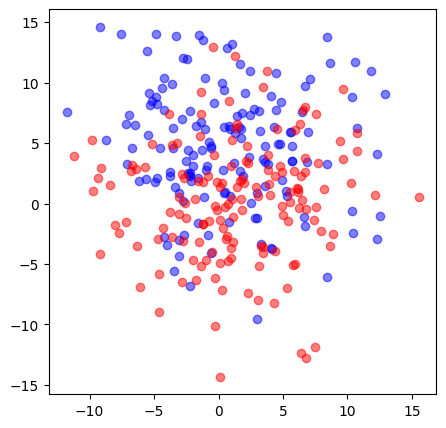

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df0 = df[df["target"]==0]
df1 = df[df["target"]==1]

plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.show()

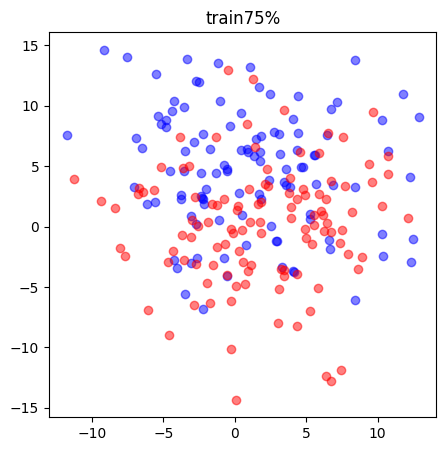

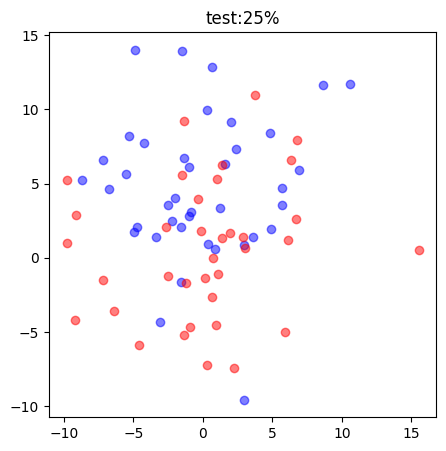

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

df = pd.DataFrame(X_train)
df["target"] = y_train

df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
plt.figure(figsize=(5, 5))

plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title("train75%")
plt.show()

df = pd.DataFrame(X_test)
df["target"] = y_test

df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
plt.figure(figsize=(5, 5))

plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title("test:25%")
plt.show()

In [ ]:
from sklearn import svm
# サポートベクターマシンで学習モデルを作る
model = svm.SVC()
# 学習用データを渡して学習する
model.fit(X_train, y_train)

SVC()

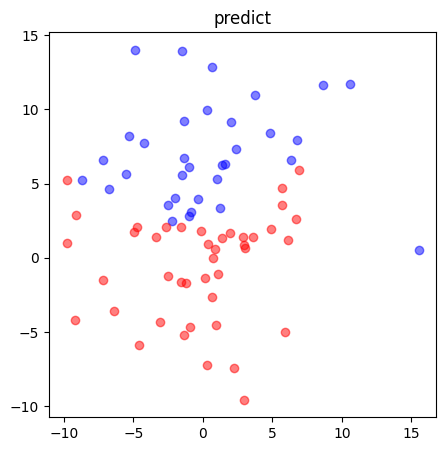

In [ ]:
pred = model.predict(X_test)

pd.DataFrame(X_test)
df["target"] = pred

df0 = df[df["target"]==0]
df1 = df[df["target"]==1]

plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title("predict")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率：", score*100, "%")

正解率： 68.0 %


In [ ]:
pred = model.predict([[1, 3]])
print("1, 3=", pred)

pred = model.predict([[1, 2]])
print("1, 2=", pred)

1, 3= [0]
1, 2= [1]


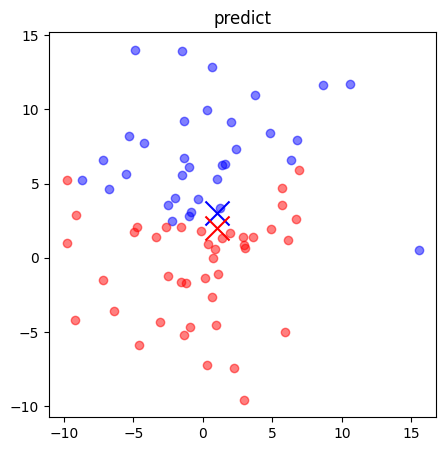

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.scatter([1], [3], color="b", marker="x", s=300)
plt.scatter([1], [2], color="r", marker="x", s=300)
plt.title("predict")
plt.show()

<ipython-input-17-7b6e98574c63>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


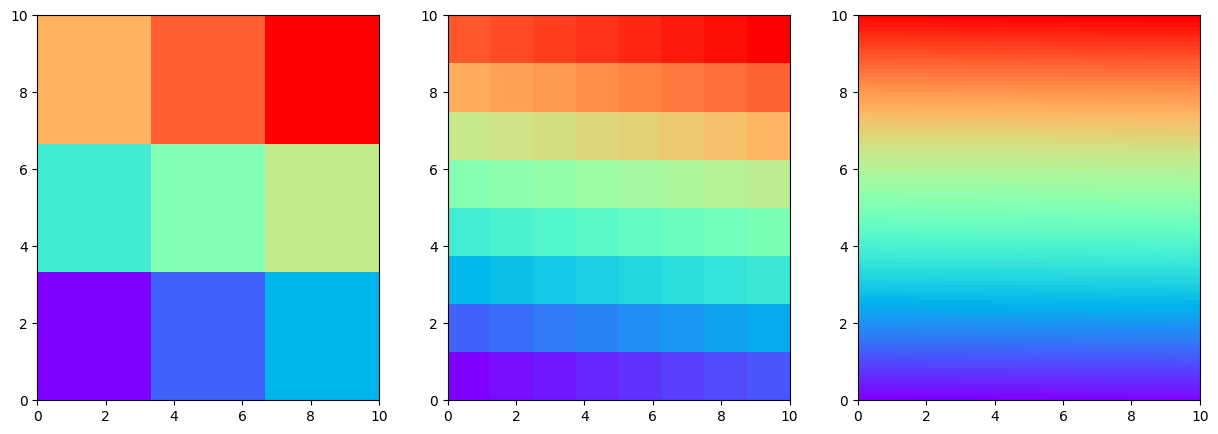

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize=(15, 5))

sizelist = [3, 8, 100]
for i in range(3):
  size=sizelist[i]
  X, Y = np.meshgrid(np.linspace(0, 10, size+1),
                     np.linspace(0, 10, size+1))
  C = np.linspace(0, 100, size*size).reshape(size, size)
  plt.subplot(1, 3, i+1)
  plt.pcolormesh(X, Y, C, cmap="rainbow")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_boundary(model, X, Y, target, xlabel, ylabel):
    cmap_dots = ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap(["#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))

    if model:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        plt.contour(XX, YY, pred, colors="gray")

    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

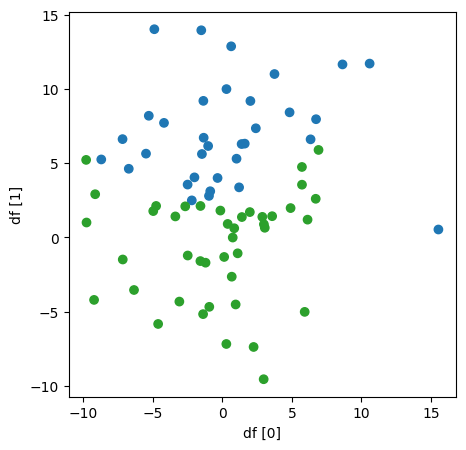

In [ ]:
df = pd.DataFrame(X_test)
pred = model.predict(X_test)
plot_boundary(None, df[0], df[1], pred, "df [0]", "df [1]")

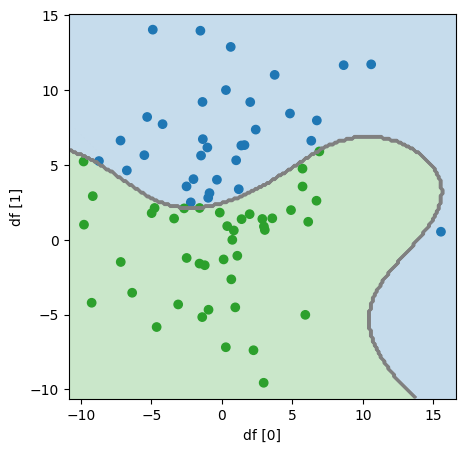

In [ ]:
plot_boundary(model, df[0], df[1], pred, "df [0]", "df [1]")

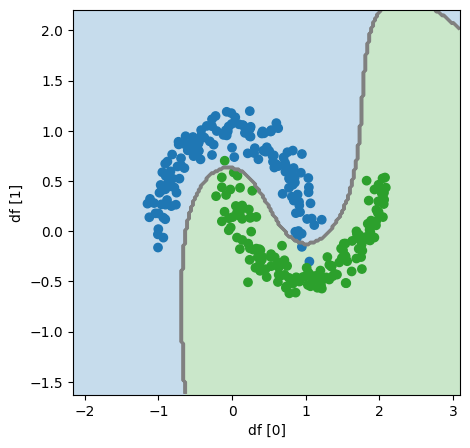

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(random_state=3,
                  noise=0.1,
                  n_samples=300)
df = pd.DataFrame(X)
model = svm.SVC()
model.fit(X, y)
plot_boundary(model, df[0], df[1], y, "df [0]", "df [1]")

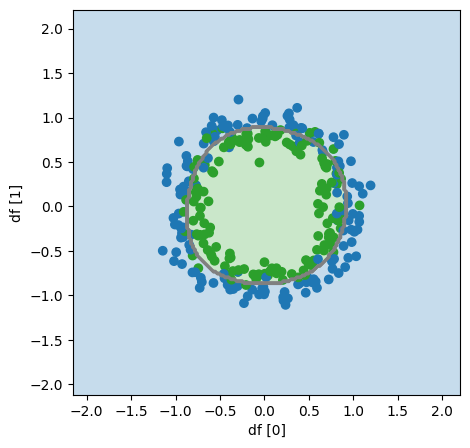

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(random_state=3,
                    noise = 0.1,
                    n_samples=300)

df = pd.DataFrame(X)
model = svm.SVC()
model.fit(X, y)
plot_boundary(model, df[0], df[1], y, "df [0]", "df [1]")